In [1]:
# Instala pandas si no está instalado 
%pip install pandas
%pip install tabulate
%pip install jinja2
%pip install matplotlib

     |████████████████████████████████| 12.2 MB 1.8 MB/s eta 0:00:01    |█████▋                          | 2.2 MB 552 kB/s eta 0:00:19     |███████▎                        | 2.8 MB 552 kB/s eta 0:00:18     |███████▍                        | 2.8 MB 552 kB/s eta 0:00:18     |███████████▎                    | 4.3 MB 785 kB/s eta 0:00:11     |█████████████▏                  | 5.0 MB 785 kB/s eta 0:00:10     |██████████████▎                 | 5.5 MB 785 kB/s eta 0:00:09     |██████████████▉                 | 5.7 MB 785 kB/s eta 0:00:09     |███████████████▍                | 5.9 MB 785 kB/s eta 0:00:09     |██████████████████▌             | 7.1 MB 4.8 MB/s eta 0:00:02     |█████████████████████▋          | 8.3 MB 4.8 MB/s eta 0:00:01     |██████████████████████          | 8.4 MB 2.2 MB/s eta 0:00:02     |██████████████████████▎         | 8.5 MB 2.2 MB/s eta 0:00:02     |███████████████████████         | 8.8 MB 2.2 MB/s eta 0:00:02     |█████████████████████████       | 9.5 MB 2.2 MB/s eta 0:

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from tabulate import tabulate

Matplotlib is building the font cache; this may take a moment.


In [3]:
dataframe = pd.read_csv('./data.csv', delimiter='|', dtype='unicode')

In [4]:
# Mostrar la cantidad de celdas
print(f'size: {dataframe.size}')
print(f'columns: {len(dataframe.columns)}')
print(f'rows: {dataframe.shape[0]}')

size: 18373432
columns: 77
rows: 238616


In [5]:
# Primeros 5 elementos como tabla
dataframe.head()
# opcion para consola: print(tabulate(dataframe[:5], headers='keys', tablefmt='psql'))

,client_id,Target,Month,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,...,CreditCard_Payment_External,CreditCard_Payment_Cash,CreditCard_Payment_Web,CreditCard_Payment_ATM,CreditCard_Payment_TAS,Investment_Numbers,Mobile,Email,Region,CreditCard_Product
0,5856970,1.0,2018-10-01,2013-10-23,2019-01-10,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,1.0,Yes,Yes,NaN,NaN
1,6371753,0.0,2018-09-01,2015-07-29,2018-06-02,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No,NaN,NaN
2,5928737,0.0,2019-01-01,2016-08-31,2018-12-27,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,NaN,NaN
3,475064,0.0,2018-12-01,2014-07-13,2017-11-30,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,NaN,NaN
4,3615172,0.0,2018-09-01,2017-12-27,2017-12-28,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No,NaN,NaN


In [6]:
def show_pie(df, column_name):
    count = df[column_name].value_counts()

    # Crear un gráfico de torta
    plt.figure(figsize=(6, 6))  # Tamaño del gráfico
    plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Gráfico de Torta de {column_name}')  # Título del gráfico

    # Mostrar el gráfico
    plt.show()

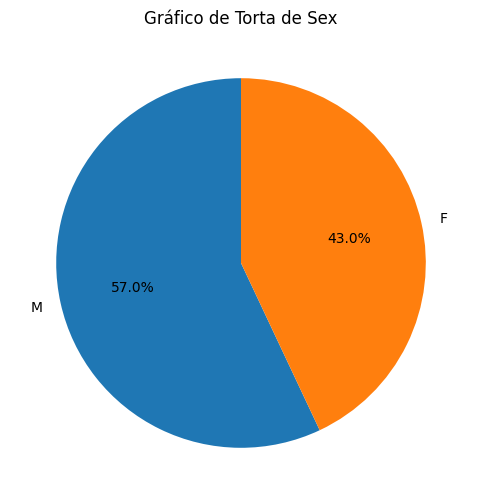

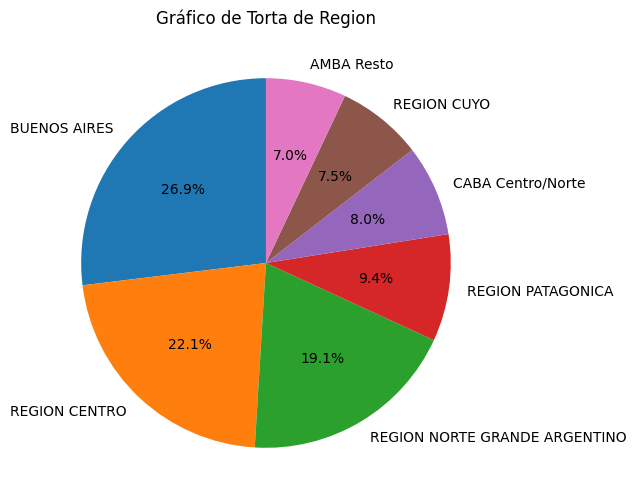

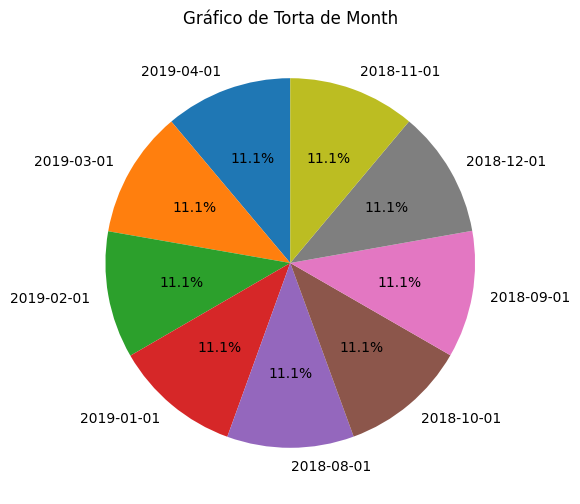

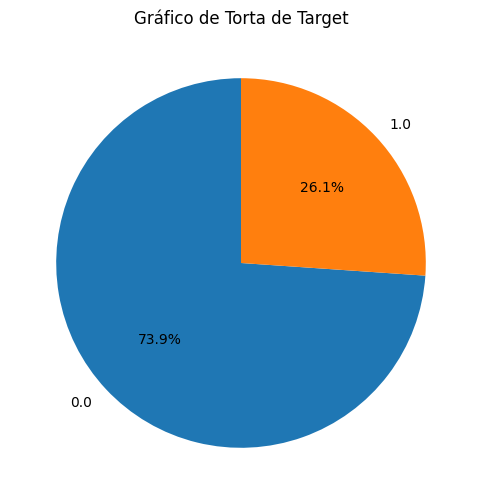

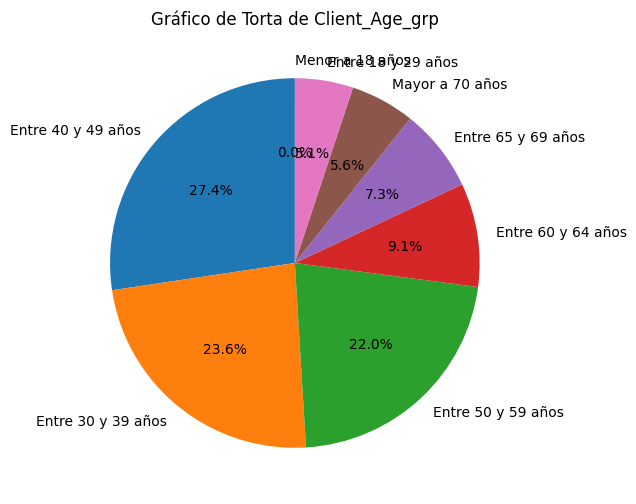

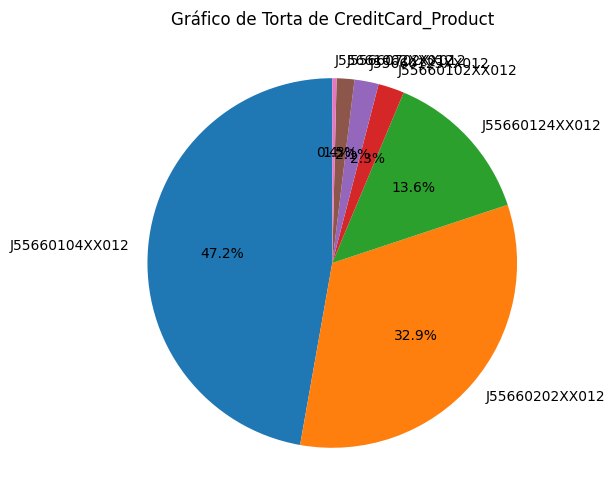

In [7]:
show_pie(dataframe, 'Sex')
show_pie(dataframe, 'Region')
show_pie(dataframe, 'Month')
show_pie(dataframe, 'Target')
show_pie(dataframe, 'Client_Age_grp')
show_pie(dataframe, 'CreditCard_Product')

In [8]:
# Limpio los datos

print('shape original:', dataframe.shape)
data = dataframe.drop_duplicates(subset=['Target', 'Month', 'client_id'])
data[(data.client_id == '(238615 rows affected)')]
print('shape filtrado:', data.shape)

shape original: (238616, 77)
shape filtrado: (238616, 77)


In [9]:
data.describe(include='all')

,client_id,Target,Month,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,...,CreditCard_Payment_External,CreditCard_Payment_Cash,CreditCard_Payment_Web,CreditCard_Payment_ATM,CreditCard_Payment_TAS,Investment_Numbers,Mobile,Email,Region,CreditCard_Product
count,238616,238615,238615,238615,238615,238615,238615,238615,238615,238615,...,238615,238615,238615,238615,238615,238615,238615,238615,53080,36636
unique,26561,2,9,3795,3411,2,2,2,2,2,...,9,6,8,8,10,24,2,2,7,7
top,5856970,0.0,2019-04-01,2004-07-30,2018-11-28,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,BUENOS AIRES,J55660104XX012
freq,9,176359,26547,1964,8402,213965,164057,213049,209807,233852,...,200830,232382,211698,228996,219687,228350,211029,172053,14293,17298


In [10]:
data = dataframe.copy()
nuevemeses = data.groupby('client_id')['Month'].count().reset_index()
nuevemeses.head()

,client_id,Month
0,(238615 rows affected),0
1,1000199,9
2,1000245,9
3,1000847,9
4,1001232,9


In [11]:
nuevemeses.value_counts()

client_id               Month
(238615 rows affected)  0        1
601455                  9        1
6015634                 9        1
6015459                 9        1
6015440                 9        1
                                ..
4227818                 9        1
4227788                 9        1
4227348                 9        1
4227062                 9        1
999462                  9        1
Name: count, Length: 26561, dtype: int64

In [12]:
data = data.merge(nuevemeses[nuevemeses.Month == 9][['client_id']], how='inner', on='client_id')
data.shape

(238347, 77)

In [13]:
data['Month'].describe(include='all')

count         238347
unique             9
top       2018-10-01
freq           26483
Name: Month, dtype: object

In [14]:
# con paquete activo
actives = data[data.Month == '2019-01-01'].copy()
sin_paquetes = actives[actives.Package_Active == 'No'].copy()

target = data[(data.Month == '2019-04-01') | (data.Month == '2019-03-01')].copy()
target

,client_id,Target,Month,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,...,CreditCard_Payment_External,CreditCard_Payment_Cash,CreditCard_Payment_Web,CreditCard_Payment_ATM,CreditCard_Payment_TAS,Investment_Numbers,Mobile,Email,Region,CreditCard_Product
2,5856970,1.0,2019-03-01,2013-10-23,2019-03-19,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,2.0,Yes,Yes,AMBA Resto,J55660202XX012
5,5856970,1.0,2019-04-01,2013-10-23,2017-09-30,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,2.0,Yes,Yes,AMBA Resto,J55660202XX012
16,6371753,0.0,2019-04-01,2015-07-29,2018-06-02,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,REGION CENTRO,NaN
17,6371753,0.0,2019-03-01,2015-07-29,2018-06-02,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,REGION CENTRO,NaN
20,5928737,0.0,2019-03-01,2016-08-31,2018-12-27,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,REGION NORTE GRANDE ARGENTINO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238328,5744054,0.0,2019-03-01,2013-06-18,2018-02-16,No,Yes,Yes,Yes,No,...,1.0,0.0,0.0,0.0,0.0,0.0,Yes,No,REGION CUYO,J55660124XX012
238334,3028372,1.0,2019-04-01,2011-07-26,2011-07-26,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,BUENOS AIRES,J55660202XX012
238336,3028372,1.0,2019-03-01,2011-07-26,2011-07-26,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,2.0,0.0,Yes,Yes,BUENOS AIRES,J55660202XX012
238342,3854449,1.0,2019-04-01,2007-11-29,2007-12-06,No,Yes,No,No,No,...,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Yes,REGION CUYO,J55660102XX012


In [15]:
data['client_id'].astype(str).str[-1].value_counts()

client_id
4    24561
3    24417
9    24201
7    24129
6    23814
2    23715
0    23625
5    23436
1    23355
8    23094
Name: count, dtype: int64